# Generalized Polarizabilties - scattering spectra


**New functionalities in `multipole` added in v1.1.3**

<span style="color: red;">**!!CAUTION!!**</span>  **: `multipole` is a new functionality. Please report possible problems and errors.**

Here we demonstrate how to use the generalized polarizabilities (GP) for scattering spectra calculation. The GP formalism is based on [1] and described in [2].

[1] Alaee, R., Rockstuhl, C. and Fernandez-Corbaton, I. *An electromagnetic multipole expansion beyond the long-wavelength approximation*. **Optics Communications** 407, 17-21 (2018)

[2] Majorel et al. *Generalized polarizabilites for an exact multipole analysis of complex nanostructures under inhomogeneous illumination*. **arXiv** (2022)



## Setup and run simulation

structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 512/512 dipoles valid


/home/pwiecha/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


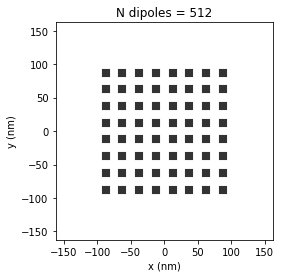

timing for wl=500.00nm - setup: EE 1230.5ms, inv.: 736.4ms, repropa.: 358.5ms (1 field configs), tot: 2391.1ms
timing for wl=520.00nm - setup: EE 10.4ms, inv.: 59.7ms, repropa.: 11.2ms (1 field configs), tot: 81.4ms
timing for wl=540.00nm - setup: EE 11.6ms, inv.: 59.0ms, repropa.: 11.3ms (1 field configs), tot: 82.2ms
timing for wl=560.00nm - setup: EE 14.9ms, inv.: 59.0ms, repropa.: 11.4ms (1 field configs), tot: 85.3ms
timing for wl=580.00nm - setup: EE 13.1ms, inv.: 59.4ms, repropa.: 11.4ms (1 field configs), tot: 84.1ms
timing for wl=600.00nm - setup: EE 12.1ms, inv.: 59.1ms, repropa.: 11.4ms (1 field configs), tot: 82.7ms
timing for wl=620.00nm - setup: EE 10.5ms, inv.: 58.6ms, repropa.: 11.4ms (1 field configs), tot: 80.6ms
timing for wl=640.00nm - setup: EE 14.3ms, inv.: 60.0ms, repropa.: 11.3ms (1 field configs), tot: 85.7ms
timing for wl=660.00nm - setup: EE 15.1ms, inv.: 60.6ms, repropa.: 11.4ms (1 field configs), tot: 87.2ms
timing for wl=680.00nm - setup: EE 11.0ms, inv.: 

In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import copy

from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import tools
from pyGDM2 import propagators
from pyGDM2 import linear
from pyGDM2 import core
from pyGDM2 import visu
from pyGDM2 import multipole


# =============================================================================
# sim setup
# =============================================================================
method = 'lu'
#method = 'cupy'


## ----- set up single structure
step = 25
mat = materials.dummy(4)

geo = structures.rect_wire(step, L=8, W=8, H=8, mesh='cube')
struct = structures.struct(step, geo, mat)
struct = structures.center_struct(struct, which_axis=['x','y','z'])


## ----- illumination
wavelengths = np.linspace(500, 1200, 36)
field_generator = fields.plane_wave
field_kwargs = dict(E_s=0, E_p=1, inc_angle=0, inc_plane='xz') # lin-pol X, normal incidence from below
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=copy.deepcopy(field_kwargs))


## ----- environment: vacuum
n1 = 1.0
dyads = propagators.DyadsQuasistatic123(n1)


## ----- simulation1
sim = core.simulation(struct=struct, efield=efield, dyads=dyads)
visu.structure(sim, tit='N dipoles = {}'.format(len(sim.struct.geometry)))



# =============================================================================
# run full simulation for comparison
# =============================================================================
sim.scatter(method=method)


wl, ext_spec = tools.calculate_spectrum(sim, 0, linear.extinct)
ex, sc, ab = ext_spec.T

wl, mpsc_spec = tools.calculate_spectrum(sim, 0, multipole.scs)
sc_p, sc_m, sc_Qe, sc_Qm = mpsc_spec.T

## scattering spectra via generalized polarisabilities

In [2]:
wl, mpsc_Kp_spec = tools.calculate_spectrum(
                        sim, 0, multipole.scs,
                        use_generalized_polarizabilities=True, 
                        with_toroidal=True, long_wavelength_approx=False)
sc_p_Kp, sc_m_Kp, sc_Qe_Kp, sc_Qm_Kp = mpsc_Kp_spec.T

wl=500.0nm. calc. K: 1953.6ms.  electric... 993.2ms.  magnetic... 199.1ms. Done.
wl=520.0nm. calc. K: 1819.3ms.  electric... 1008.0ms.  magnetic... 199.9ms. Done.
wl=540.0nm. calc. K: 1812.7ms.  electric... 1024.1ms.  magnetic... 201.4ms. Done.
wl=560.0nm. calc. K: 1831.7ms.  electric... 1008.4ms.  magnetic... 200.9ms. Done.
wl=580.0nm. calc. K: 1944.6ms.  electric... 1015.2ms.  magnetic... 200.4ms. Done.
wl=600.0nm. calc. K: 1857.1ms.  electric... 1007.6ms.  magnetic... 199.3ms. Done.
wl=620.0nm. calc. K: 2038.9ms.  electric... 1017.4ms.  magnetic... 199.3ms. Done.
wl=640.0nm. calc. K: 1911.9ms.  electric... 1008.5ms.  magnetic... 196.1ms. Done.
wl=660.0nm. calc. K: 2020.2ms.  electric... 1003.7ms.  magnetic... 196.1ms. Done.
wl=680.0nm. calc. K: 2255.0ms.  electric... 998.7ms.  magnetic... 194.5ms. Done.
wl=700.0nm. calc. K: 1883.9ms.  electric... 1013.7ms.  magnetic... 196.2ms. Done.
wl=720.0nm. calc. K: 1881.4ms.  electric... 1002.7ms.  magnetic... 195.1ms. Done.
wl=740.0nm. calc. 

## Plot

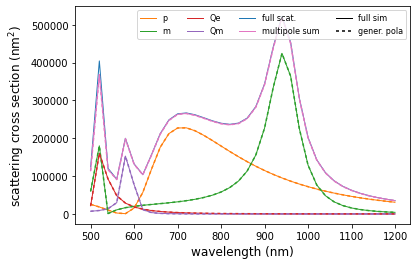

In [3]:

plt.plot(wl, sc_p, c='C1', lw=1, label='p')
plt.plot(wl, sc_m, c='C2', lw=1, label='m')
plt.plot(wl, sc_Qe, c='C3', lw=1, label='Qe')
plt.plot(wl, sc_Qm, c='C4', lw=1, label='Qm')
plt.plot(wl, sc, lw=1, label='full scat.')
plt.plot(wl, (sc_p+sc_m+sc_Qm+sc_Qe), c='C6', lw=1, label='multipole sum')

plt.plot(wl, sc_p_Kp, c='C1', label='', dashes=[2,2])
plt.plot(wl, sc_m_Kp, c='C2', label='', dashes=[2,2])
plt.plot(wl, sc_Qe_Kp, c='C3', label='', dashes=[2,2])
plt.plot(wl, sc_Qm_Kp, c='C4', label='', dashes=[2,2])
plt.plot(wl, (sc_p_Kp+sc_m_Kp+sc_Qm_Kp+sc_Qe_Kp), c='C6', dashes=[2,2], label='')

plt.plot([], [], c='k', lw=1, label='full sim')
plt.plot([], [], c='k', dashes=[2,2], label='gener. pola')

plt.xlabel('wavelength (nm)', fontsize=12)
plt.ylabel('scattering cross section (nm$^2$)', fontsize=12)
plt.legend(fontsize=8, ncol=4)
plt.show()